Output variable -> y
y -> Whether the client has subscribed a term deposit or not 
Binomial ("yes" or "no")


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv("C:\\Users\\sneha\\Downloads\\bank-full2.csv")

In [4]:
df.shape

(45211, 17)

In [5]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [7]:
from sklearn.preprocessing import LabelEncoder
le= LabelEncoder()

In [8]:
df['outcome']=le.fit_transform(df['y'])

In [10]:
df.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
outcome      0
dtype: int64

In [11]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous,outcome
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323,0.116985
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441,0.321406
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000,1.000000


In [19]:
df.duplicated().sum()

0

In [44]:
df.corr()

,age,balance,day,duration,campaign,pdays,previous,outcome
age,1.000000,0.097783,-0.009120,-0.004648,0.004760,-0.023758,0.001288,0.025155
balance,0.097783,1.000000,0.004503,0.021560,-0.014578,0.003435,0.016674,0.052838
day,-0.009120,0.004503,1.000000,-0.030206,0.162490,-0.093044,-0.051710,-0.028348
duration,-0.004648,0.021560,-0.030206,1.000000,-0.084570,-0.001565,0.001203,0.394521
campaign,0.004760,-0.014578,0.162490,-0.084570,1.000000,-0.088628,-0.032855,-0.073172
pdays,-0.023758,0.003435,-0.093044,-0.001565,-0.088628,1.000000,0.454820,0.103621
previous,0.001288,0.016674,-0.051710,0.001203,-0.032855,0.454820,1.000000,0.093236
outcome,0.025155,0.052838,-0.028348,0.394521,-0.073172,0.103621,0.093236,1.000000


In [12]:
plt.rcParams['figure.figsize']=(10,5)
plt.rcParams['figure.dpi']= 250

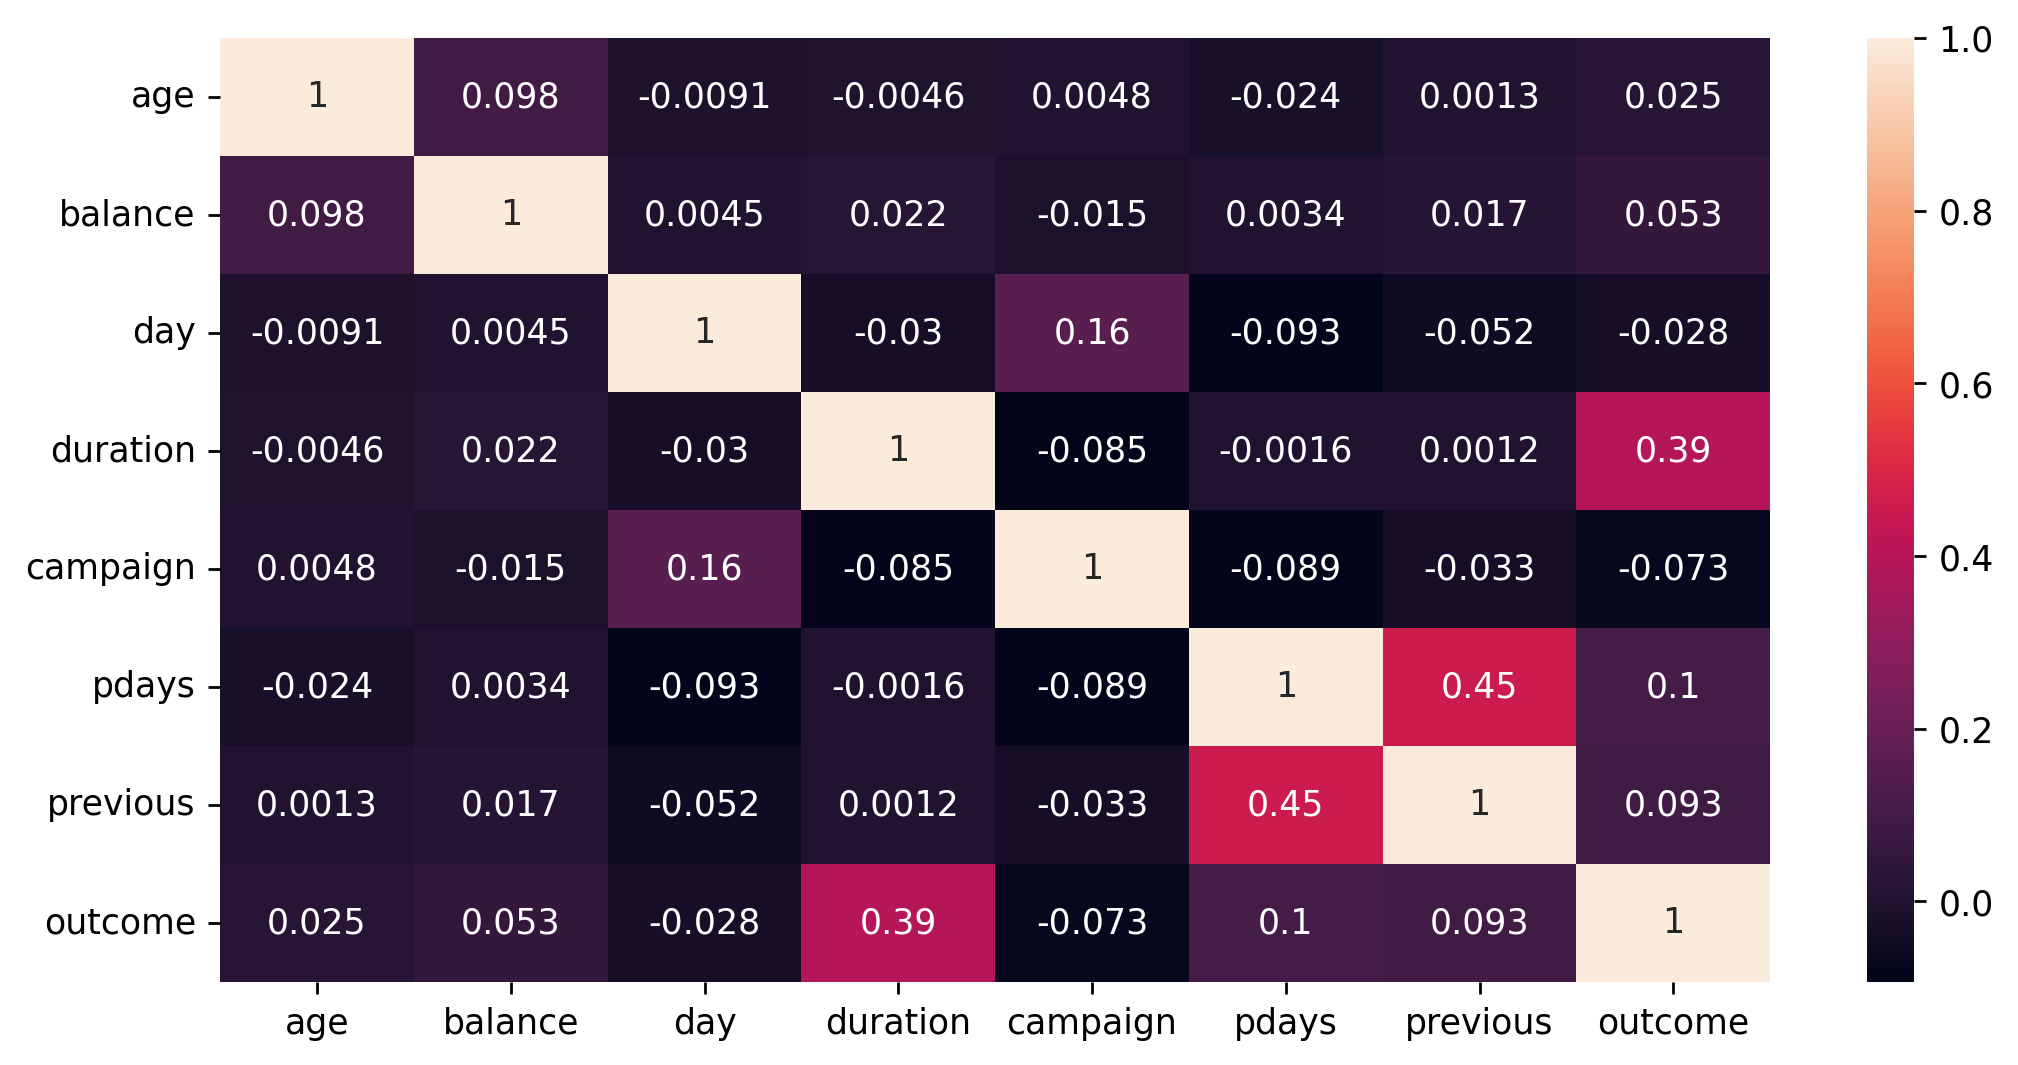

In [13]:
sns.heatmap(df.corr(), annot = True);

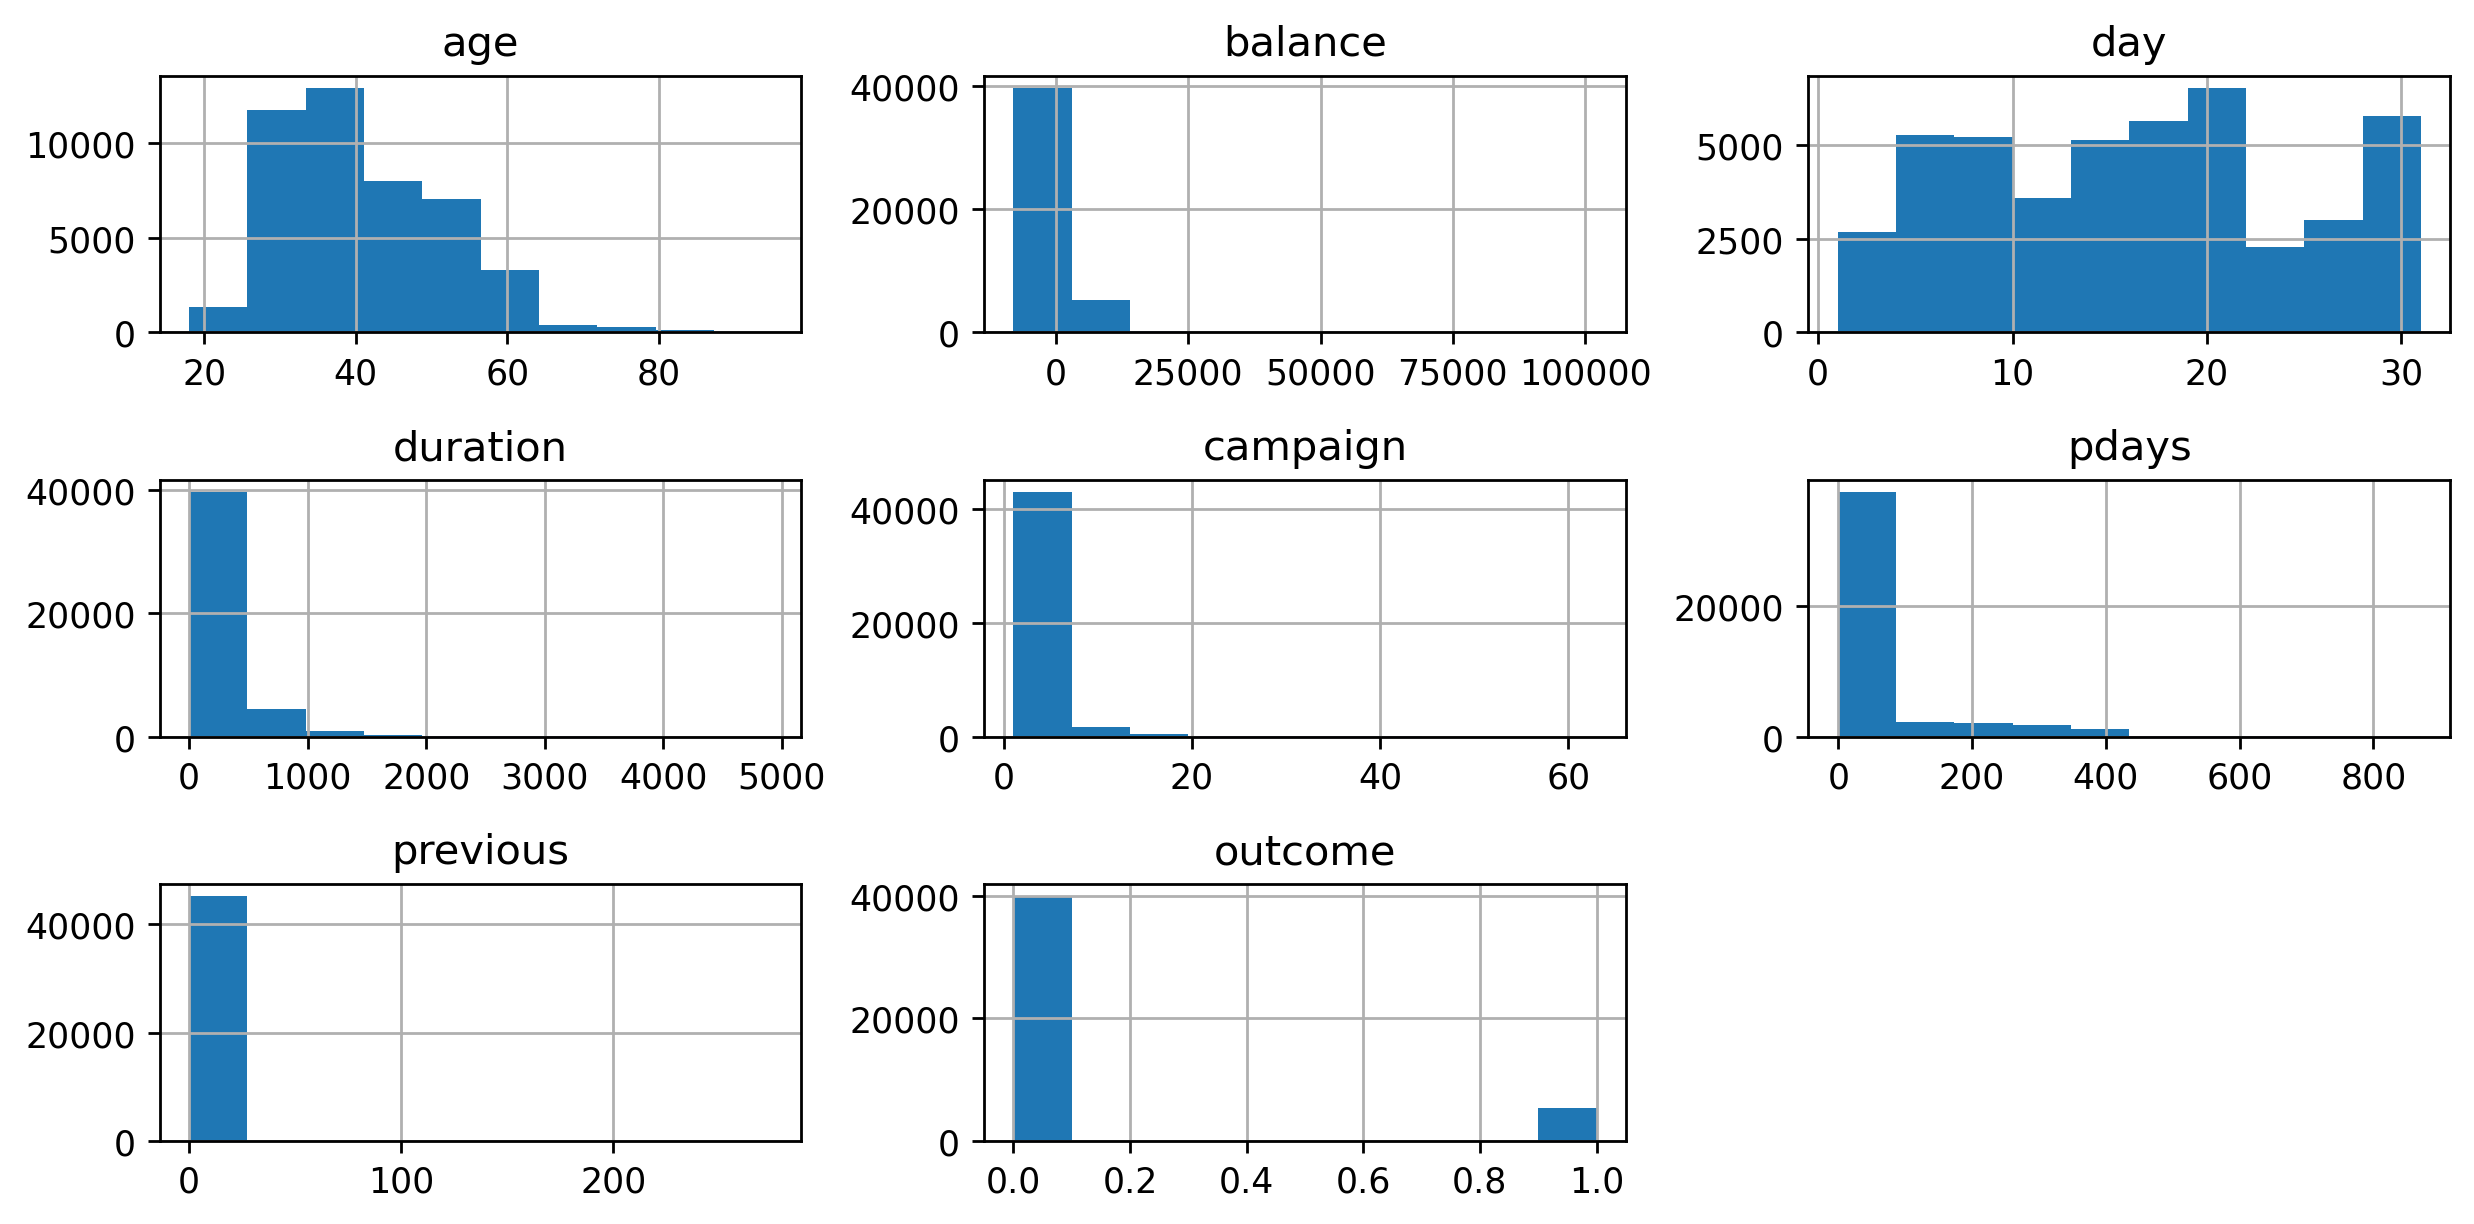

In [14]:
df.hist()
plt.tight_layout();

In [15]:
from sklearn.linear_model import LogisticRegression

In [16]:
lc = LogisticRegression()

In [17]:
x = df[['age','balance','duration','campaign']]
y= df['outcome']

In [18]:
lc.fit(x,y)

LogisticRegression()

In [19]:
lc.coef_

array([[ 7.69721806e-03,  3.72191058e-05,  3.54908906e-03,
        -1.39828316e-01]])

In [20]:
lc.intercept_

array([-3.24652357])

In [21]:
lc.predict(x)

array([0, 0, 0, ..., 1, 0, 0])

In [22]:
lc.predict_proba(x)

array([[0.87367389, 0.12632611],
       [0.92488732, 0.07511268],
       [0.94596321, 0.05403679],
       ...,
       [0.30553761, 0.69446239],
       [0.82336233, 0.17663767],
       [0.86407826, 0.13592174]])

In [23]:
lc.predict_proba(x)[:,1]

array([0.12632611, 0.07511268, 0.05403679, ..., 0.69446239, 0.17663767,
       0.13592174])

In [25]:
y_predict = pd.DataFrame({'actual':df['outcome'], 'probability':lc.predict_proba(x)[:,1],'predict':lc.predict(x) })

In [26]:
y_predict

,actual,probability,predict
0,0,0.126326,0
1,0,0.075113,0
2,0,0.054037,0
3,0,0.066483,0
4,0,0.080944,0
...,...,...,...
45206,1,0.555944,1
45207,1,0.214680,0
45208,1,0.694462,1
45209,0,0.176638,0


In [27]:
y_predict['correct']= y_predict['actual']==y_predict['predict']

In [28]:
y_predict

,actual,probability,predict,correct
0,0,0.126326,0,True
1,0,0.075113,0,True
2,0,0.054037,0,True
3,0,0.066483,0,True
4,0,0.080944,0,True
...,...,...,...,...
45206,1,0.555944,1,True
45207,1,0.214680,0,False
45208,1,0.694462,1,True
45209,0,0.176638,0,True


In [63]:
y_predict['correct'].value_counts()

True     40196
False     5015
Name: correct, dtype: int64